# Volume 1: K-Means Clustering.
    <Name> Brian James
    <Class> Sec 03
    <Date> October 19, 2021

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import random
import math
import numpy as np

In [3]:
plt.rcParams["figure.dpi"] = 200

## Problem 1

Write a `KMeans` class for doing basic $k$-means clustering.
Implement the following methods, following `sklearn` class conventions.
1. `__init__()`: Accept a number of clusters $k$, a maximum number of iterations, and a convergence tolerance.
Store these as attributes.

2. `fit()`: Accept an $m \times n$ matrix $X$ of $m$ data points with $n$ features.
Choose $k$ random rows of $X$ as the initial cluster centers.
Run the $k$-means iteration until consecutive centers are within the convergence tolerance, or until iterating the maximum number of times.
Save the cluster centers as attributes.
If a cluster is empty, reassign the cluster center as a random row of $X$.
Return `self` after completing this process.

3. `predict()`: Accept an $l \times n$ matrix $X$ of data.
Return an array of $l$ integers where the $i$th entry indicates which cluster center the $i$th row of $X$ is closest to.

Test your class on the iris data set (`sklean.datasets.load_iris()`) after reducing the data to two principal components (with `sklearn.decomposition.PCA`).
Plot the data, coloring by cluster. It should look similar to the graphs in the lab.

In [4]:
class KMeans:
    """Basic k-means clustering class."""
    def __init__(self, n_clusters=8, max_iter=100, tol=1e-5, p=2, normalize=False):
        """Store clustering algorithm parameters.
        
        Parameters:
            n_clusters (int): How many clusters to compute.
            max_iter (int): The maximum number of iterations to compute.
            tol (float): The convergence tolerance.
            p (float): The norm to use
            normalize (bool): Whether to normalize the centers at each step
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.p = p
        self.normalize = normalize
        self.cluster_centers = []
        self.partition_data = []
    
    def fit(self, X, y=None):
        """Compute the cluster centers from random initial conditions.
        
        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        m_size = len(X)
        n_size = len(X[0])
        init_rows = random.sample(range(m_size),self.n_clusters)
        u_cluster = []
        partition_S = []
        for i in init_rows:
            u_cluster.append(X[i]) # this is u_{i}^{1} with k centroids. Each subset corresponds to a centroid
        if self.normalize: # If true, normalize the u_cluster
            for vector in u_cluster:
                norm = (sum([x**self.p for x in vector]))**(1/self.p) # ||u||
                vector = [x/norm for x in vector]  # u/||u||        
        
        for times in range(self.max_iter):  # max number of times to repeat algorithm  
            for i in range(self.n_clusters): # create empty partition set with k subsets e.g S = [[],[],[]] when k=3
                partition_S.append([])

            for data in X:  # compare all data points to each u_cluster
                min = math.inf
                partition_index = 0
                
                
                for i in range(len(u_cluster)):  # find the closest cluster
                    distance = sum([abs(x-y)**self.p for x,y in zip(data,u_cluster[i])])
                    
                    if distance < min:
                        min = distance
                        partition_index = i
                partition_S[partition_index].append(data)  # assign datapoint to respective partition

            """Recompute the cluster centers as the mean of each partition"""
            old_cluster = u_cluster.copy()
            for subset_index in range(len(partition_S)):
                u_cluster[subset_index] = [sum(x)/len(x) for x in zip(*partition_S[subset_index])]
                
                        
            """If cluster is empty, reassign the cluster center as a random row of X"""
            for subset_i in range(len(partition_S)):
                if partition_S[subset_i] == []:
                    random_row = random.randint(0,m_size-1)
                    u_cluster[subset_i] = X[subset_i]
                    
            if self.normalize: # If true, normalize the u_cluster
                for vector in u_cluster:
                    norm = (sum([x**self.p for x in vector]))**(1/self.p) # ||u||
                    vector = [x/norm for x in vector]  # u/||u|| 

            convergence = True
            for i in range(len(u_cluster)):
                if math.dist(u_cluster[i],old_cluster[i]) > self.tol:
                    convergence = False
            if convergence == True:  # if the old cluster and updated cluster is close enough, then break out
                break
            if times != self.max_iter-1:  # reset the partition list if repeating the algorithm
                partition_S.clear()
        
        
        self.partition_data = partition_S
        self.cluster_centers = u_cluster
        
        
        return self
    
    def predict(self, X):
        """Classify each entry of X based on which cluster center it belongs to.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        
        Returns:
            ((n_samples) ndarray): Integer labels from 0 to n_clusters-1 for each entry of X.
        """
        label_list = []
        
        for data in X:
            min = math.inf
            partition_index = 0
            for i in range(len(self.cluster_centers)):
                distance = sum([abs(x-y)**self.p for x,y in zip(data,self.cluster_centers[i])])
                if distance < min:
                    min = distance
                    partition_index = i
            label_list.append(partition_index)
        return label_list
        
        #raise NotImplementedError("Problem 1 Incomplete")
    
    def fit_predict(self, X, y=None):
        """Fit to the data and return the resulting labels.

        Parameters:
            X ((n_samples, n_classes) ndarray): the data to be clustered.
        """
        return self.fit(X).predict(X)

In [ ]:
#run this cell to get the iris data
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = PCA(n_components=2).fit_transform(iris.data)

In [ ]:
#test the iris data

testData = KMeans(4)
testData = testData.fit(iris_data)
x_0_val = [x[0] for x in testData.partition_data[0]]
y_0_val = [x[1] for x in testData.partition_data[0]]
plt.plot(x_0_val,y_0_val, 'bo')

x_1_val = [x[0] for x in testData.partition_data[1]]
y_1_val = [x[1] for x in testData.partition_data[1]]
plt.plot(x_1_val,y_1_val, 'ro')

x_2_val = [x[0] for x in testData.partition_data[2]]
y_2_val = [x[1] for x in testData.partition_data[2]]
plt.plot(x_2_val,y_2_val, 'ko')

x_3_val = [x[0] for x in testData.partition_data[3]]
y_3_val = [x[1] for x in testData.partition_data[3]]
plt.plot(x_3_val,y_3_val, 'go')

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

"""
x = [x[0] for x in iris_data]
y = [x[1] for x in iris_data]

plt.plot(x,y, 'o')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()
"""
"""
data = KMeans(3)
data = data.fit(iris_data)
data.predict(iris_data)
"""

## Problem 2

Modify `KMeansfit()` to take in a paramter `p` which gives us the norm to be used. 

Import and parse the Sacramento housing data.
1. Use your `KMeans` class with a chosen `norm` on the housing data, let n=12.
2. Experiment with different norms.
3. Plot the data, coloring by cluster.
Also mark the cluster centers.
In a Markdown cell explain which norm is best for decreasing the longest distance to farthest home.

In [ ]:
sac_data = np.load("sacramento.npy")
lat_long_data = sac_data[:,[6,7]]
lat_long_data = lat_long_data[:,[1,0]]
#print(lat_long_data)

testData = KMeans(12,1000,1e-5,1) #4 clusters, p value 2
testData = testData.fit(lat_long_data)

x_0_val = [x[0] for x in testData.partition_data[0]]
y_0_val = [x[1] for x in testData.partition_data[0]]
plt.plot(x_0_val,y_0_val, 'bo',markersize=2)
plt.plot(testData.cluster_centers[0][0],testData.cluster_centers[0][1],'b*',markersize=10)

x_1_val = [x[0] for x in testData.partition_data[1]]
y_1_val = [x[1] for x in testData.partition_data[1]]
plt.plot(x_1_val,y_1_val, 'o',markersize=2,color='red')
plt.plot(testData.cluster_centers[1][0],testData.cluster_centers[1][1],'*',markersize=10,color='red')

x_2_val = [x[0] for x in testData.partition_data[2]]
y_2_val = [x[1] for x in testData.partition_data[2]]
plt.plot(x_2_val,y_2_val, 'ko',markersize=2)
plt.plot(testData.cluster_centers[2][0],testData.cluster_centers[2][1],'k*',markersize=10)

x_3_val = [x[0] for x in testData.partition_data[3]]
y_3_val = [x[1] for x in testData.partition_data[3]]
plt.plot(x_3_val,y_3_val, 'go',markersize=2)
plt.plot(testData.cluster_centers[3][0],testData.cluster_centers[3][1],'g*',markersize=10)

x_4_val = [x[0] for x in testData.partition_data[4]]
y_4_val = [x[1] for x in testData.partition_data[4]]
plt.plot(x_4_val,y_4_val, 'o',markersize=2,color='cyan')
plt.plot(testData.cluster_centers[4][0],testData.cluster_centers[4][1],'*',markersize=10,color='cyan')

x_5_val = [x[0] for x in testData.partition_data[5]]
y_5_val = [x[1] for x in testData.partition_data[5]]
plt.plot(x_5_val,y_5_val, 'o',markersize=2,color='fuchsia')
plt.plot(testData.cluster_centers[5][0],testData.cluster_centers[5][1],'*',markersize=10,color='fuchsia')

x_6_val = [x[0] for x in testData.partition_data[6]]
y_6_val = [x[1] for x in testData.partition_data[6]]
plt.plot(x_6_val,y_6_val, 'o',markersize=2,color='yellow')
plt.plot(testData.cluster_centers[6][0],testData.cluster_centers[6][1],'*',markersize=10,color='yellow')

x_7_val = [x[0] for x in testData.partition_data[7]]
y_7_val = [x[1] for x in testData.partition_data[7]]
plt.plot(x_7_val,y_7_val, 'o',markersize=2,color='maroon')
plt.plot(testData.cluster_centers[7][0],testData.cluster_centers[7][1],'*',markersize=10,color='maroon')

x_8_val = [x[0] for x in testData.partition_data[8]]
y_8_val = [x[1] for x in testData.partition_data[8]]
plt.plot(x_8_val,y_8_val, 'o',markersize=2,color='chocolate')
plt.plot(testData.cluster_centers[8][0],testData.cluster_centers[8][1],'b*',markersize=10,color='chocolate')

x_9_val = [x[0] for x in testData.partition_data[9]]
y_9_val = [x[1] for x in testData.partition_data[9]]
plt.plot(x_9_val,y_9_val, 'o',markersize=2,color='lime')
plt.plot(testData.cluster_centers[9][0],testData.cluster_centers[9][1],'*',markersize=10,color='lime')

x_10_val = [x[0] for x in testData.partition_data[10]]
y_10_val = [x[1] for x in testData.partition_data[10]]
plt.plot(x_10_val,y_10_val, 'o',markersize=2,color='dodgerblue')
plt.plot(testData.cluster_centers[10][0],testData.cluster_centers[10][1],'k*',markersize=10,color='dodgerblue')

x_11_val = [x[0] for x in testData.partition_data[11]]
y_11_val = [x[1] for x in testData.partition_data[11]]
plt.plot(x_11_val,y_11_val, 'o',markersize=2,color='crimson')
plt.plot(testData.cluster_centers[11][0],testData.cluster_centers[11][1],'g*',markersize=10,color='crimson')

The best p-value for keeping the maximum distance between the furthest house in each cluster was p=1. It seemed that every time I assigned p to a greater number, the isolated homes in the bottom left were really far from the centroid of the cluster.

## Problem 3

Modify `KMeans.fit()` so that if `normalize` is `True`, the cluster centers are normalized at each iteration.

Cluster the earthquake data in three dimensions by converting the data from spherical coordinates to euclidean coordinates on the sphere.
1. Convert longitude and latitude to radians, then to spherical coordinates.
(Hint: `np.deg2rad()` may be helpful.)
2. Convert the spherical coordinates to euclidean coordinates in $\mathbb{R}^3$.
3. Use your `KMeans` class with normalization to cluster the euclidean coordinates.
4. Translate the cluster center coordinates back to spherical coordinates, then to degrees.
5. Plot the data, coloring by cluster.
Also mark the cluster centers.

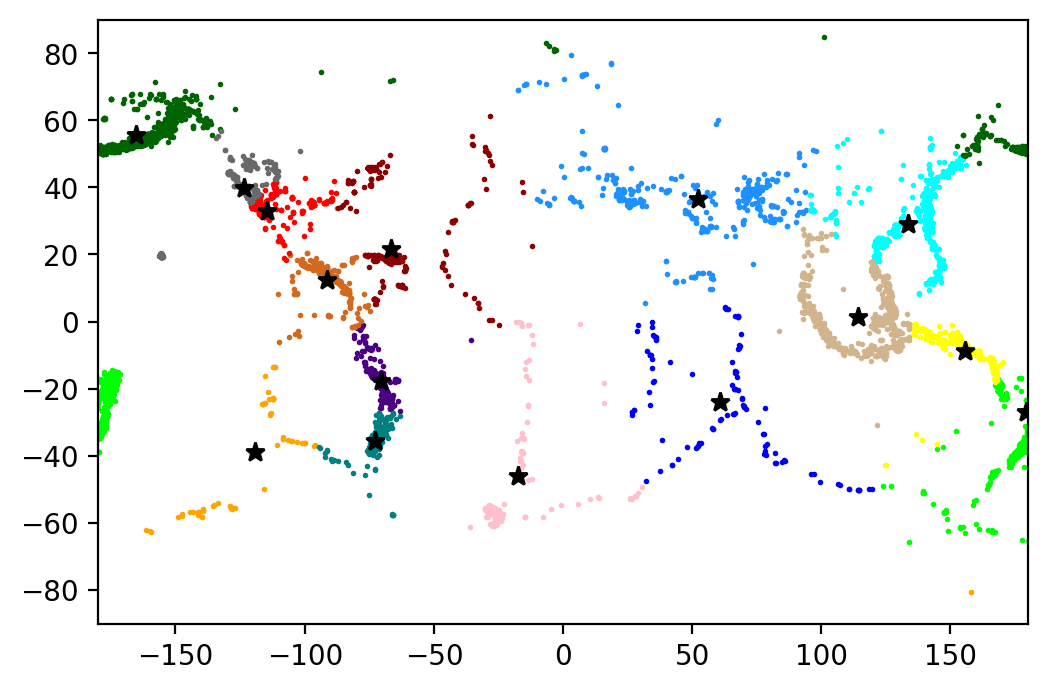

In [8]:
earthq_data = np.load("earthquake_coordinates.npy")

euclidean_data = []
# Convert each row to euclidean coordinates
for row in earthq_data:
    theta = np.deg2rad(row[0])
    rho = np.deg2rad(90-row[1])
    x = np.sin(rho)*np.cos(theta)
    y = np.sin(rho)*np.sin(theta)
    z = np.cos(rho)
    row = [x,y,z]
    euclidean_data.append(row)
testData = KMeans(15,100,1e-5,2,True)
testData = testData.fit(euclidean_data)

#Convert the euclidean coordinates back to latitude and longitude
cluster_means = []
partitions = []
for row in testData.cluster_centers:
    theta = np.arctan2(row[1],row[0])
    rho = np.arccos(row[2])
    longitude = theta * 180/np.pi
    latitude = 90 - rho*180/np.pi
    cluster_means.append([longitude,latitude])

for row in testData.partition_data:
    single_partition = []
    for vector in row:
        longitude = np.arctan2(vector[1],vector[0]) * 180/np.pi
        latitude = 90 - np.arccos(vector[2])*180/np.pi
        single_partition.append([longitude,latitude])
    partitions.append(single_partition)

# Plot the 15 clusters

color_list = ['pink','indigo','blue','dodgerblue','cyan','lime','darkgreen','yellow','orange','tan','chocolate','darkred','red','dimgrey','teal']
for i in range(15):
    x = [x[0] for x in partitions[i]]
    y = [x[1] for x in partitions[i]]
    plt.plot(x,y,'o',markersize=1,color=color_list[i])
    plt.plot(cluster_means[i][0],cluster_means[i][1],'*',markersize=7,color='black')
plt.xlim([-180,180])
plt.ylim([-90,90])
plt.show()

## Problem 4

Write a function that accepts an image array (of shape $(m,n,3)$), an integer number of clusters $k$, and an integer number of samples $S$.
Reshape the image so that each row represents a single pixel.
Choose $S$ pixels to train a $k$-means model on with $k$ clusters.
Make a copy of the original picture where each pixel has the same color as its cluster center.
Return the new image.
For this problem, you may use `sklearn.cluster.KMeans` instead of your `KMeans` class.

Test your function on some of the provided NASA images.

In [ ]:
def quantize_image(im, n_clusters=4, n_samples=50):
    """Cluster the pixels of the image 'im' by color.
    Return a copy of the image where each pixel is replaced by the value
    of its cluster center.
    
    Parameters:
        im ((m,n,3) ndarray): an image array.
        n_clusters (int): the number of k-means clusters.
        n_samples (int): the number of pixels to train the k-means model on.
    
    Returns:
        ((m,n,3) ndarray): the quantized image.
    """
    raise NotImplementedError("Problem 4 Incomplete")